# OVERVIEW OF MOTOR VEHICLE CRASHES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
import openpyxl
import geopandas
from shapely import wkt
import plotly.express as px
import analysis as a
import warnings
import math
warnings.filterwarnings('ignore')

In [2]:
total_fatalities = pd.read_excel('data/figure1.xls')
total_fatalities.head()

Year  Total Fatalities  Vehicle Miles Traveled (VMT) Millions  \
0  1899                26                                    NaN   
1  1900                36                                    NaN   
2  1901                54                                    NaN   
3  1902                79                                    NaN   
4  1903               117                                    NaN   

   Fatality Rate per 100 Million VMT  
0                                NaN  
1                                NaN  
2                                NaN  
3                                NaN  
4                                NaN

### OVERALL TRENDS

#### 1. Fatalities and Fatality Rate per 100 Million VMT, 1975-2019

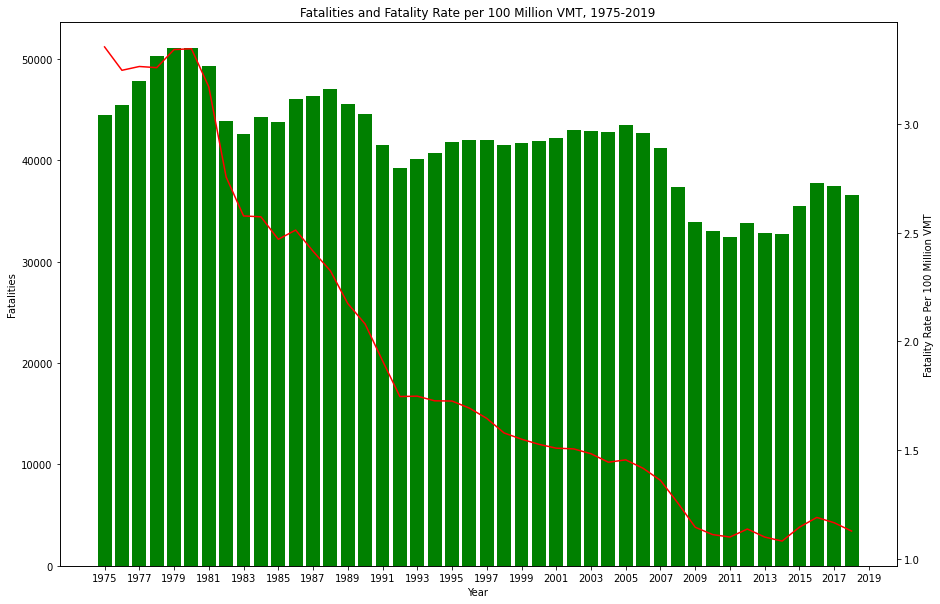

In [3]:
total_fatalities_sliced = total_fatalities[total_fatalities['Year']>=1975]
start_year = int(total_fatalities_sliced.iloc[0][0])
graph_details = {"start_year": start_year, "xlabel": "Year", "ylabel": "Fatalities", "line_bar_key": "Fatality" }

a.bar_line_chart(total_fatalities_sliced, graph_details)

##### This graph shows two overlapping plots. The green barchart shows the count of the number of fatalities over the years. The red line chart shows the fatality rate per 100 Million VMT (Vehicle Miles Travlled) and how in the recent years after reaching a recent high of 37806 in 2016, the number and rate of fatalities have been decreasing

#### 2. People Injured and Injury Rate per 100 Million VMT, 1988-2019

In [4]:
injuries = pd.read_excel('data/injuries.xlsx' , header = 4)
injuries.rename(columns={"Injured": "Total Injuries"}, inplace = True)
injuries["Year"] = pd.to_numeric(injuries["Year"])
injury_rate = injuries[["Year", "Injury Rate per 100 Million VMT"]]

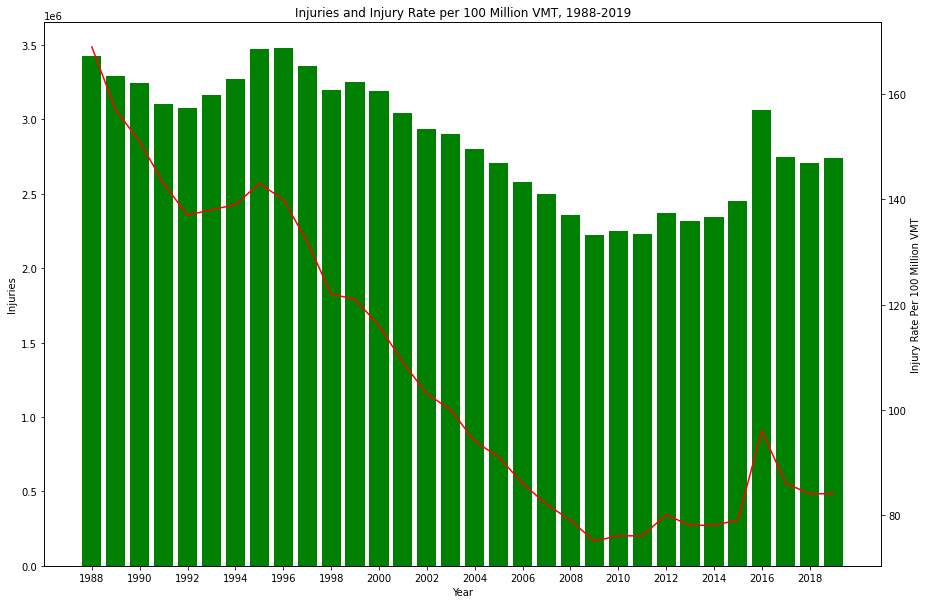

In [5]:
start_year = int(injuries.iloc[0][0])
graph_details = {"start_year": start_year, "xlabel": "Year", "ylabel": "Injuries", "line_bar_key": "Injury" }

a.bar_line_chart(injuries, graph_details)

##### This graph shows two overlapping plots. The black barchart shows the count of the number of people injured over the years. The yellow line chart shows the injury rate per 100 Million VMT (Vehicle Miles Travlled) and how in the recent years after reaching a recent peak of 3,240,000 in 2016, the number and rate of fatalities have been decreasing.

#### From the above graphs, we observe a common anomaly. 2016 was the deadliest year recently. Let us try and analyse why is that the case.


In [6]:
gasoline_prices = pd.read_excel("data/gasoline_prices.xlsx")

In [7]:
gasoline_prices = gasoline_prices.iloc[10:]
price_vs_injuries  = pd.merge(gasoline_prices, injury_rate, on = "Year")
price_vs_injuries.head()

Year  Average Gasoline Prices by Year  Injury Rate per 100 Million VMT
0  1988                            0.964                              169
1  1989                            1.060                              157
2  1990                            1.217                              151
3  1991                            1.196                              143
4  1992                            1.190                              137

In [8]:
# import plotly.express as px
# df = px.data.iris()
fig = px.scatter(price_vs_injuries, x="Average Gasoline Prices by Year", y="Injury Rate per 100 Million VMT", color="Average Gasoline Prices by Year",
                 size='Injury Rate per 100 Million VMT', hover_data=['Year'])
fig.show()

#### From the scatter plot it is clear that the years where the gasoline prices are low there are more injuries because people tend to travel more. This naturally, leads to more accidents.

### People Killed and Injured, by Person Type

#### 3. Fatality Composition, by Person Type, 2010 and 2019

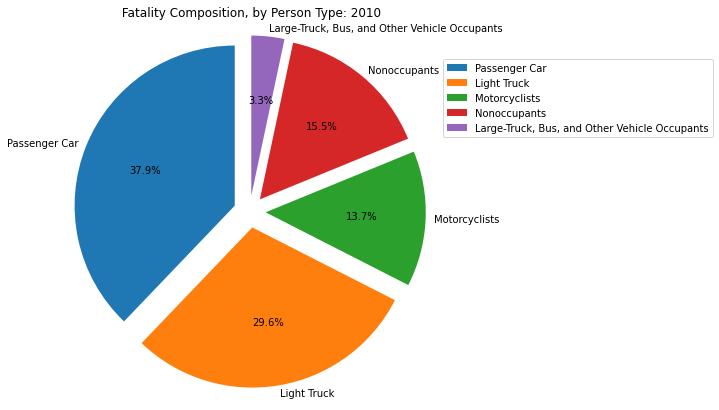

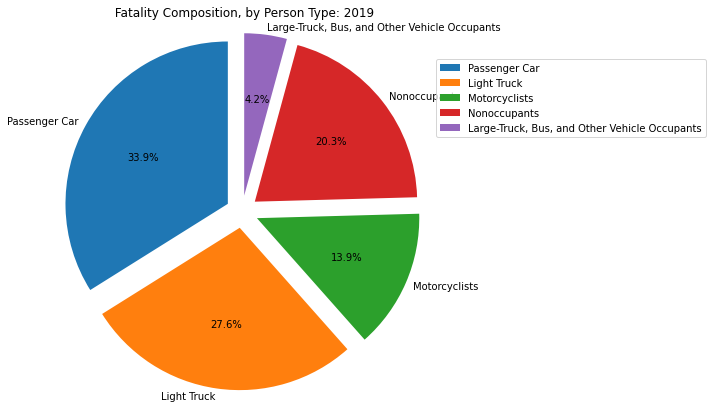

In [9]:
xlfile=["data/2010/TSF_Table_65.xlsx", "data/2019/TSF_Table_65.xlsx"]
xlfile1 = ["data/2010/TSF_Table_54.xlsx", "data/2019/TSF_Table_54.xlsx"]

for i in range(len(xlfile)):
    df = pd.read_excel(xlfile[i],engine='openpyxl', header=4, usecols=['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'])
    df.fillna(method='ffill', inplace=True)
    df.columns=['Vehicle Type', 'Person Type', 'Occupants Killed']
#     print(df)
    for j in range(len(xlfile1)):
        if i==j:
            df1 = pd.read_excel(xlfile1[j],engine='openpyxl', header=3, usecols=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])
            df1.fillna(method='ffill', inplace=True)
            df1.columns=['Vehicle Type', 'Person Type', 'Occupants Killed']
            df = pd.concat([df,df1], axis=0)
            total_killed = a.values(df)
            total_killed['Large-Truck, Bus, and Other Vehicle Occupants'] = total_killed['Large Truck']+total_killed['Bus']+ total_killed['Other/Unknown\nVehicle']
            del total_killed['Large Truck'], total_killed['Bus'],total_killed['Other/Unknown\nVehicle']
            year=xlfile[i][5:9]
            a.plotpie(total_killed, year)

##### Non occupants include Pedestrians, Pedalcyclistes, and other non occupants. The above pie chart shows the fatalities occured depending on the person type, (such as car occupants, large -truck, bus occupants, pedalcyclists etc) from 2010 and 2019. Assuming same comparison between 2010 and 2019, the biggest change is seen in the percentage of non occupant fatalities from 15% to 20%;and there is a small decrease in the passenger car and light truck occupant fatalities. 

#### 4. Proportion of Fatalities Inside/Outside Vehicle, 1975-2019

In [10]:
proportion_of_fatalities = pd.read_excel("data/figure4.xlsx" , header = 4)
proportion_of_fatalities.head()

Injury Severity  Year  Passenger Cars  Light Trucks  Large Trucks  Buses  \
0          Killed  1975           25929          4856           961     53   
1          Killed  1976           26166          5438          1132     73   
2          Killed  1977           26782          5976          1287     42   
3          Killed  1978           28153          6745          1395     41   
4          Killed  1979           27808          7178          1432     39   

   Other/Unknown  Occupants Total  Motorcycles  Pedestrians  Pedalcyclists  \
0            937            32736         3189         7516           1003   
1            981            33790         3312         7427            914   
2            959            35046         4104         7732            922   
3            622            36956         4577         7795            892   
4            579            37036         4894         8096            932   

   Other/Unknown Nonoccupants  nonoccupants Total  Total  
0                          81                8600  44525  
1                          80                8421  45523  
2                          74                8728  47878  
3                         111                8798  50331  
4                         135                9163  51093

In [11]:
proportion_of_fatalities = proportion_of_fatalities.loc[proportion_of_fatalities["Injury Severity"] == "Killed"]
proportion_of_fatalities["Inside Vehicle"] = proportion_of_fatalities["Occupants Total"]/proportion_of_fatalities["Total"]*100
proportion_of_fatalities["Outside Vehicle"] = 100 - proportion_of_fatalities["Inside Vehicle"]
proportion_of_fatalities = proportion_of_fatalities[["Year", "Occupants Total", "nonoccupants Total", "Total", "Inside Vehicle", "Outside Vehicle"]]

In [12]:
pedestrians = pd.read_excel("data/pedestrians_fatal.xlsx", usecols = ["Crash Date (Year)", "Total"])
pedestrians = pedestrians.rename(columns={"Crash Date (Year)": "Year", "Total": "Pedestrians_killed"})

In [13]:
pedestrians.head()

Year  Pedestrians_killed
0  2005                5313
1  2006                5169
2  2007                5053
3  2008                4788
4  2009                4453

In [14]:
proportion_of_fatalities = proportion_of_fatalities.merge(pedestrians,on='Year', how='left')

In [15]:
# def plot_line(df, col1, col2):
#     fig = px.line(df, x="Year", y= df.columns[col1:col2])
#     fig.show()

In [16]:
a.plot_line(proportion_of_fatalities, 4, 6)
# fig = px.line(proportion_of_fatalities, x="Year", y= proportion_of_fatalities.columns[4:6])
# fig.show()
# fig = px.line(fig4_sliced, x="Year", y="Outside Vehicle")
# fig.show()

In [17]:
fatalities_since_2005 = proportion_of_fatalities[proportion_of_fatalities["Year"]>=2005].copy()

In [18]:
# data_canada = data[data.country == 'Canada']
fig = px.bar(fatalities_since_2005, x='Year', y='Pedestrians_killed',
             hover_data=['nonoccupants Total','Outside Vehicle'], height=400)
fig.show()

#### From the above graphs we observe that the number of pedestrians killed has increased significantly over the years and is a major contributor to the number of non-occupants that have been killed in accidents.

##### The above black line chart shows that the percentage of people killed '"inside" the vehicle (occupants of the vehicle) has decreased from the recent peak in 1966 at about 80% to 66% in 2019.
##### The red line chart shows the percentage of people killed "outside" the vehicle (motorcyclists, pedestrians, pedalcyclists, other non occupants). The percentage has increased from 20% in 1966 to about 35% in 2019.

#### 5. Fatalities by Land Use 1975 - 2019

In [19]:
fatalities_by_land_use = pd.read_excel("data/figure5.xlsx")
fatalities_by_land_use = fatalities_by_land_use[["Year", "Urban Deaths", "Rural Deaths", "UD_Perct", "RD_Perct", "Total Deaths"]]

In [20]:
a.plot_line(fatalities_by_land_use, 1, 3)
# fig = px.line(fatalities_by_land_use, x="Year", y= fatalities_by_land_use.columns[1:3])
# fig.show()

In [21]:
# plt.figure(1, figsize=(15,5))
# plt.title('Fatalities by Land Use, 1975-2019')
# linechart1 = plt.plot(fig5['Year'], fig5['Urban Deaths'], color='black', label='Urban')
# plt.xlabel('Year')
# plt.ylabel('Count of Fatalities')
# # plt.twinx()
# linechart2 = plt.plot(fig5['Year'], fig5['Rural Deaths'], color='red', label='Rural')
# plt.xticks(x)
# plt.legend()
# # plt.yticks(y)

##### The above graph shows that the number of fatalities have usually been greater for the rural area until 2016, where the number of fatalities in urban area were greater than the rural area.
##### In the past year, there has been a slight decrease in the number of urban fatalities (~4%) and slight increase (~0.1%) in rural fatalities. Overall, the count of urban fatalities is still greater than the rural fatalities.

### Traffic Fatalities and Percentage Changes based on User input for year, by State

In [22]:
traffic_fatalities = {}
traffic_fatalities_normalized = {}
for year in range(2011, 2020):
    crash = a.read_file(year, "CRASH")
    vehicle = a.read_file_excel(year, "vehicle", head = 5)
    vehicle = vehicle[["Unnamed: 0", "Unnamed: 15"]]
    vehicle = vehicle.drop([51,52])
    vehicle = vehicle.rename(columns = {"Unnamed: 0": "States", "Unnamed: 15": "Total_Vehicle{}".format(year)})
    crash = crash.drop([0,1,2,3,59,58,57,56,55])
    crash = crash.rename(columns = {"Table 106": "NAME", "Unnamed: 1": "fatalities{}" .format(year-1) , 
                            "Unnamed: 2": "fatalities{}".format(year) ,
                        "Unnamed: 3": "% Change{}".format(year)})
    crash.reset_index(inplace = True)
    crash = crash.drop("index",axis =1)  
    crash_vehicle = crash.join(vehicle)
    crash_vehicle["fatalities{}".format(year)] = crash_vehicle["fatalities{}".format(year)].str.replace(',', '').astype(int)
    crash_vehicle["Total_Vehicle{}".format(year)] = crash_vehicle["Total_Vehicle{}".format(year)].replace(',', '').astype(int)
    crash_vehicle["Normalized_Fatalities{}".format(year)] = crash_vehicle["fatalities{}".format(year)] * 100000/crash_vehicle["Total_Vehicle{}".format(year)]
    traffic_fatalities[year] = crash
    traffic_fatalities_normalized[year] = crash_vehicle

#### FOR NORMALIZED MAP

In [23]:
year = int(input("Enter the year:\n"))

Enter the year:
2019


In [24]:
states_shp = a.states_shape_merge(traffic_fatalities_normalized, year)
states_shp.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS        NAME LSAD         ALAND  \
0      06  01779778  0400000US06    06     CA  California   00  403483823181   
1      12  00294478  0400000US12    12     FL     Florida   00  138903200855   
2      13  01705317  0400000US13    13     GA     Georgia   00  148963503399   
3      16  01779783  0400000US16    16     ID       Idaho   00  214045425549   
4      17  01779784  0400000US17    17     IL    Illinois   00  143794747023   

        AWATER     region                                           geometry  \
0  20483271881       West  MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...   
1  31407883551  Southeast  MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...   
2   4947080103  Southeast  POLYGON Z ((-85.60516 34.98468 0.00000, -85.47...   
3   2397728105       West  POLYGON Z ((-117.24303 44.39097 0.00000, -117....   
4   6200927458    Midwest  POLYGON Z ((-91.50617 40.20064 0.00000, -91.49...   

   fatalities2018  fatalities2019 % Change2019        States  \
0            3798            3606           -5   California    
1            3135            3183            2      Florida    
2            1505            1491           -1      Georgia    
3             234             224           -4         Idaho   
4            1035            1009           -3  Illinois (2)   

   Total_Vehicle2019  Normalized_Fatalities2019  
0           31247270                  11.540208  
1           17833719                  17.848212  
2            8594566                  17.348171  
3            1954527                  11.460573  
4           10691946                   9.437010

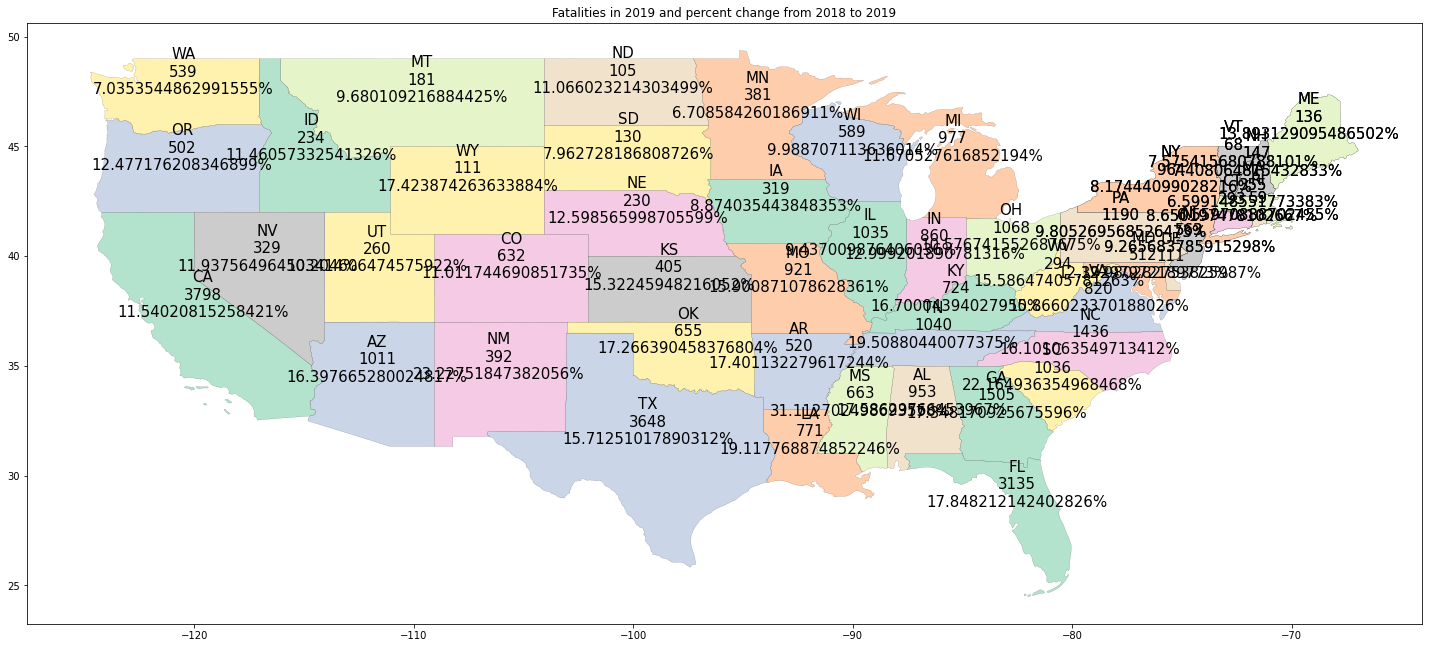

In [25]:
a.percent_change_plot(states_shp, "Normalized_Fatalities", year)

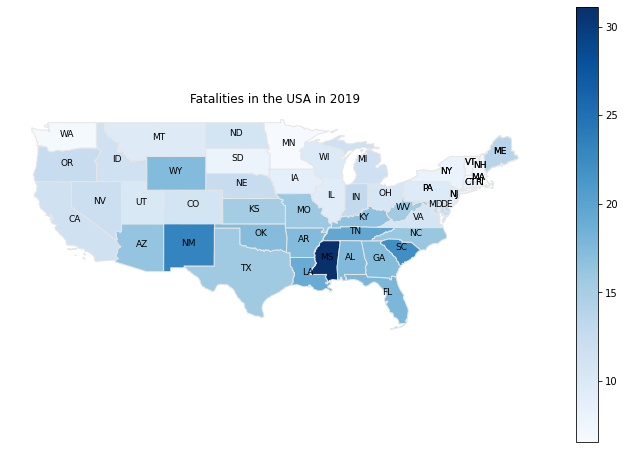

In [26]:
a.chloropleth(states_shp, "Normalized_Fatalities",  year)

In [27]:
year = int(input("Enter the year:\n"))

Enter the year:
2019


In [28]:
states_shp = a.states_shape_merge(traffic_fatalities, year)

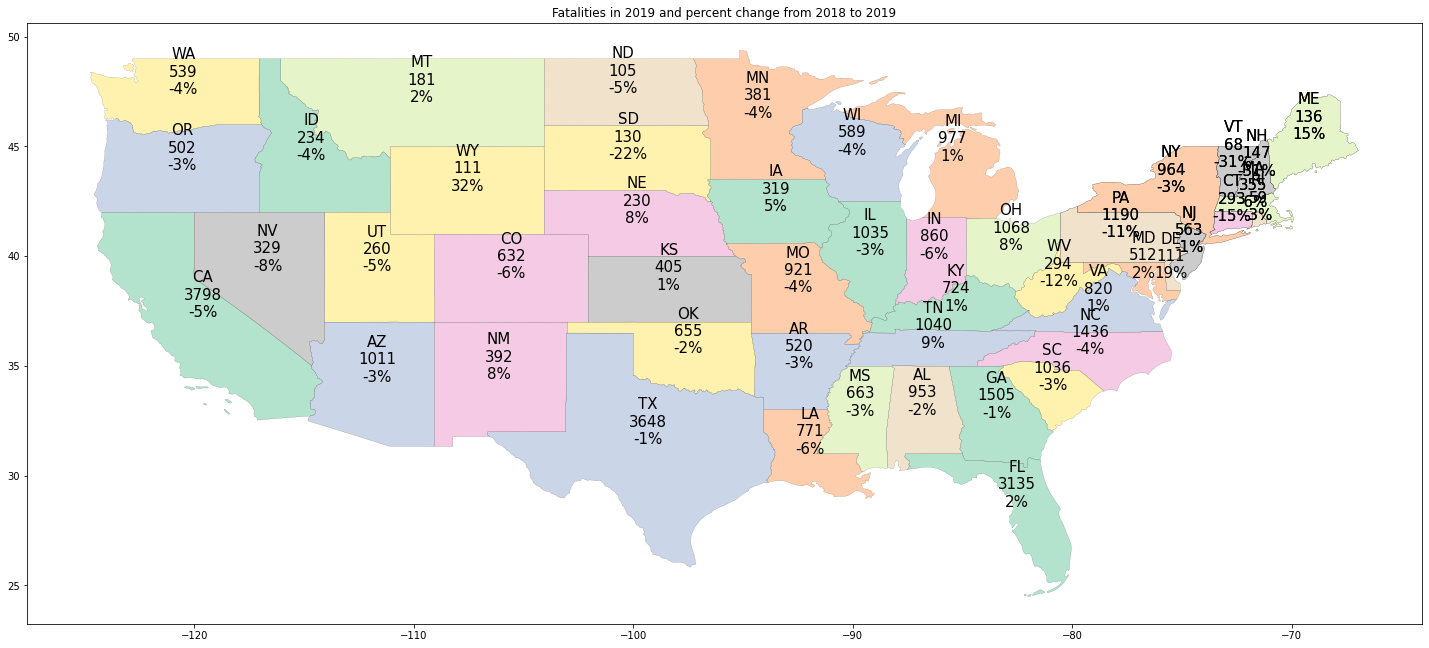

In [29]:
a.percent_change_plot(states_shp, "% Change", year)

##### The above graph depicts the nmber of fatalities in each state in the US. The percentage shows the percent change from the previous year. This particular graph depicts the change from 2014 to 2015 based on the user input, i.e. 2015. To create this graph we used a shape file for the map of USA and we merged this with our existing dataset which helped us get the output as shown.


#### Chloropleth Map of the above graph.

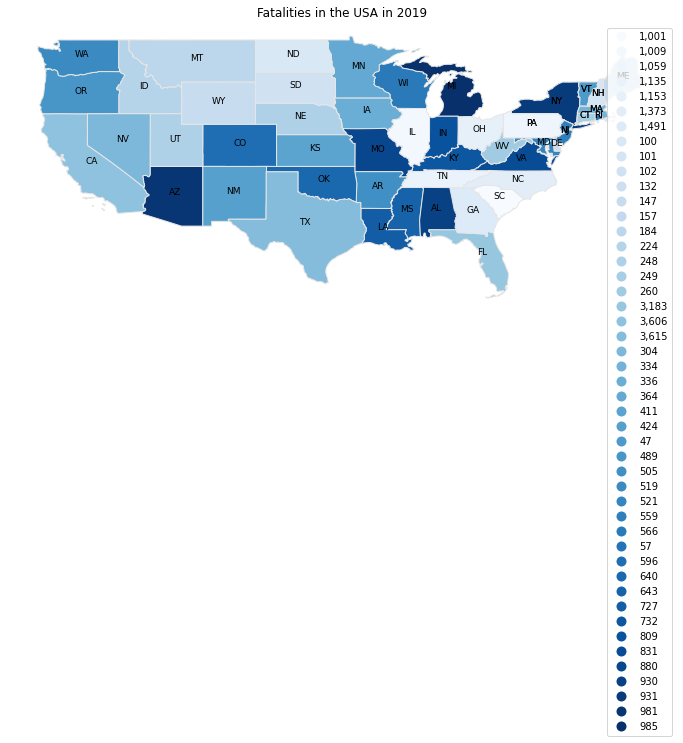

In [30]:
# fig, ax = plt.subplots(1, figsize=(12,8))
# states_shp.apply(lambda x: ax.annotate(
#     s=x.STUSPS , 
#     xy=x.geometry.centroid.coords[0],
#     ha='center', 
#     fontsize=9
# ),axis=1);
# states_shp.plot(column='fatalities{}'.format(year), cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
# plt.title('Fatalities in the USA in {}'.format(year))
# ax.axis('off')
a.chloropleth(states_shp, "fatalities", year)

##### This graph clearly shows that California, Texas and Florida has the highest fatalities in 2015 (user input) as compared to the other states.

### Restraint use

In [31]:
restraint_use = pd.read_excel("data/restrain_type.xlsx", header = 4)

In [32]:
restraint_use.head()

Crash Severity  Year   Restrained Number  Restrained Percent  \
0          Fatal  1975                2580                 5.6   
1          Fatal  1976                2059                 4.5   
2          Fatal  1977                1895                 3.9   
3          Fatal  1978                1878                 3.6   
4          Fatal  1979                1680                 3.2   

   Unrestrained Number  Unrestrained Percent  Unknown Number  Unknown Percent  \
0                29713                  64.3           13931             30.1   
1                29908                  64.7           14239             30.8   
2                33013                  67.3           14154             28.8   
3                37610                  72.3           12510             24.1   
4                38326                  73.5           12123             23.3   

   Total Number  Percent  
0         46224      100  
1         46206      100  
2         49062      100  
3         51998      100  
4         52129      100

In [33]:
ru_fatal = restraint_use[restraint_use["Crash Severity"] == "Fatal"].copy()

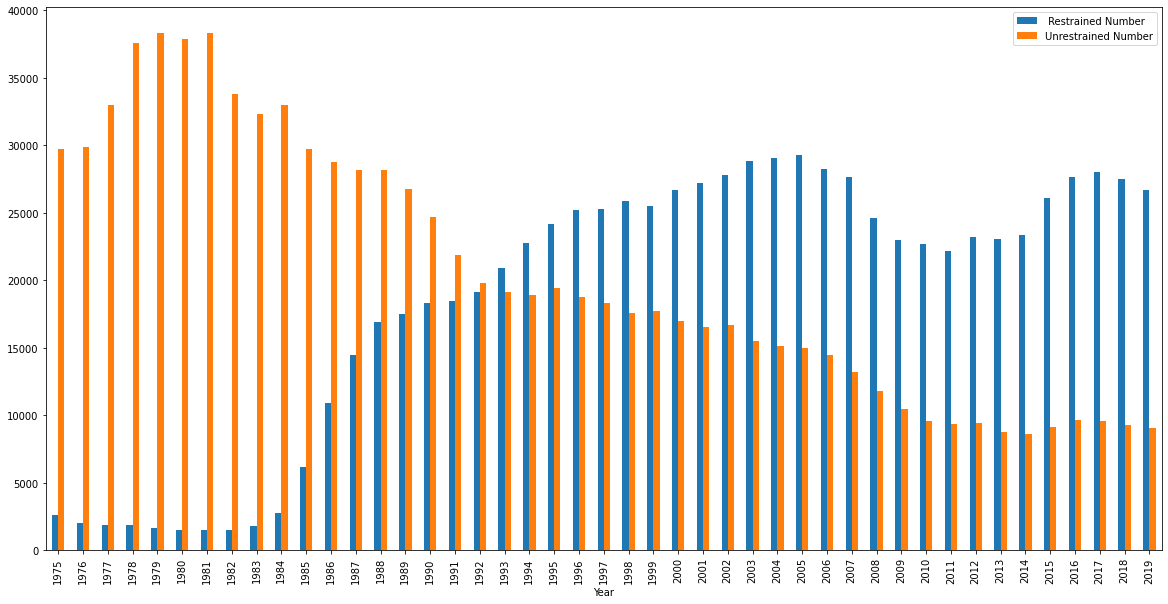

In [34]:
x = []
for i in range(1975, 2020,1):
    x.append(i)
X_axis = np.arange(len(ru_fatal))  
plt.rcParams['figure.figsize'] = [20, 10]
ru_fatal.plot(x="Year", y=[" Restrained Number", "Unrestrained Number"], kind="bar")
plt.show()

## HYPOTHESIS 1

### There are more fatal crashes on weekends (Friday, Saturday, Sunday)

In [35]:
for i in range(2010,2020):
    fp = 'data/'+str(i) +'/'+str(i)+ '.xlsx'
    df = pd.read_excel(fp, header = 4)
    df.fillna(method='ffill', inplace=True)
    df1 = df[df["Crash Severity"] == "Fatal Crashes"].copy()
    df1.drop(['Crash Severity'], axis=1, inplace = True)
    if i == 2010:
        df2 = df1.copy()
    else:
        df2["Sunday"] += df1["Sunday"]
        df2["Monday"] += df1["Monday"]
        df2["Tuesday"] += df1["Tuesday"]
        df2["Wednesday"] += df1["Wednesday"]
        df2["Thursday"] += df1["Thursday"]
        df2["Friday"] += df1["Friday"]
        df2["Saturday"] += df1["Saturday"]
        df2["Total"] +=df1["Total"]
df2

Time  Sunday  Monday  Tuesday  Wednesday  Thursday  \
0  Midnight to 2:59 a.m.    9721    3504     2854       3213      3731   
1    3 a.m. to 5:59 a.m.    5972    3025     2718       2831      3078   
2    6 a.m. to 8:59 a.m.    3424    4852     4882       4794      4881   
3   9 a.m. to 11:59 a.m.    3816    4459     4302       4320      4433   
4      Noon to 2:59 p.m.    5758    5778     5799       5594      5710   
5    3 p.m. to 5:59 p.m.    7118    7017     6791       6971      7043   
6    6 p.m. to 8:59 p.m.    8001    6792     6640       6909      7124   
7   9 p.m. to 11:59 p.m.    6016    5199     5262       5501      6301   
8                Unknown     453     292      270        278       271   
9                  Total   50279   40918    39518      40411     42572   

   Friday  Saturday   Total  
0    4882      9276   37181  
1    3540      5616   26780  
2    4858      4112   31803  
3    4578      4744   30652  
4    6331      6394   41364  
5    7948      7888   50776  
6    8544      9130   53140  
7    8780      9337   46396  
8     321       459    2344  
9   49782     56956  320436

In [36]:
dataframes_dict = {}
dataframes_dict_model = {}
dataframes_dict_drink = {}
for year in range(2010,2020):
    person_year = a.read_file(year, "PERSON")
    accident_year = a.read_file(year, "ACCIDENT")
    accident_year = accident_year[['ST_CASE', 'DAY_WEEK']]
    person_year = person_year[["ST_CASE", "STATE","MAN_COLL","AIR_BAG","DRINKING", "INJ_SEV", "HOUR", "MOD_YEAR"]]
    drink_yes_no = person_year[["DRINKING", "INJ_SEV", "HOUR"]]
    model_death = person_year[["INJ_SEV", "MOD_YEAR"]]
    person_year =  person_year.merge(accident_year, on='ST_CASE', how='left')
    dataframes_dict[year] = person_year
    dataframes_dict_model[year] = model_death
    dataframes_dict_drink[year] = drink_yes_no
print(dataframes_dict[2010].columns)

Index(['ST_CASE', 'STATE', 'MAN_COLL', 'AIR_BAG', 'DRINKING', 'INJ_SEV',
       'HOUR', 'MOD_YEAR', 'DAY_WEEK'],
      dtype='object')


In [37]:
year = int(input("Enter the year:\n"))

Enter the year:
2019


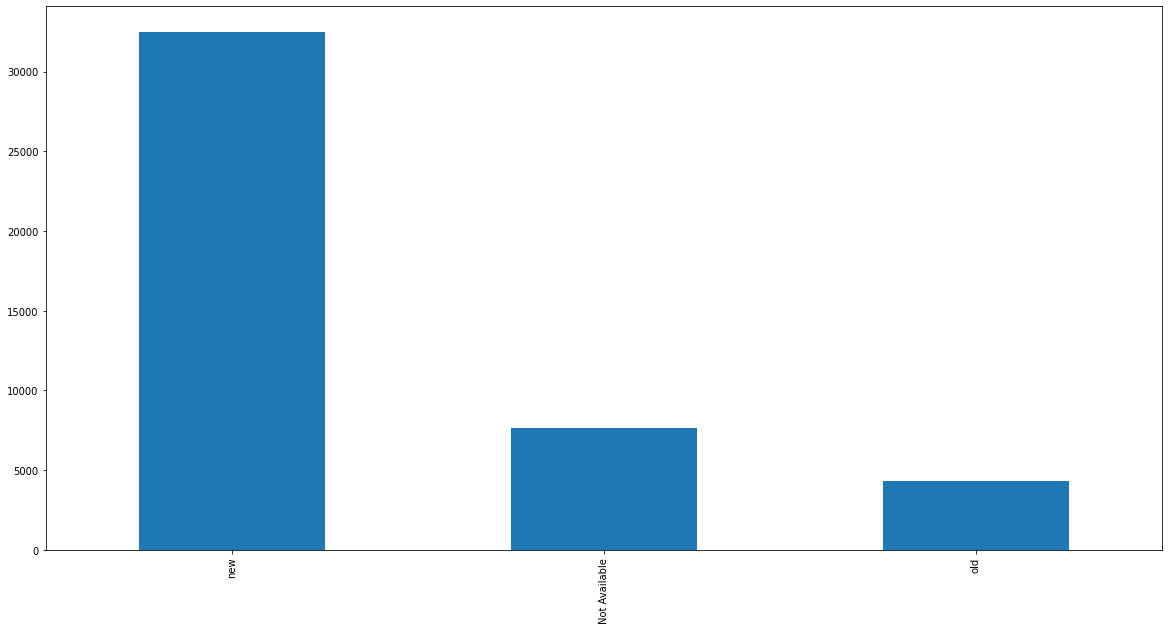

In [38]:
model_death = dataframes_dict_model[year] 
model_death = model_death[model_death["MOD_YEAR"]!=9999]
model_death = model_death[(model_death["INJ_SEV"] == 4) | (model_death["INJ_SEV"] == 2)]
model_death['segregation'] = 'Not Available'
# set multiple conditions and assign category with .loc
model_death.loc[(model_death['MOD_YEAR'] >= 1979) & (model_death['MOD_YEAR'] <= 2000), 'segregation'] = 'old'
model_death.loc[(model_death['MOD_YEAR'] >= 2000) & (model_death['MOD_YEAR'] <= 2019), 'segregation'] = 'new'
model_death["segregation"].value_counts().plot(kind='bar')

In [39]:
drink_drive = dataframes_dict_drink[year] 
drink_drive = drink_drive[(drink_drive["INJ_SEV"] == 4) | (drink_drive["INJ_SEV"] == 2)]
drunk_drive_yes = drink_drive[drink_drive["DRINKING"]== 1]
drunk_drive_no = drink_drive[drink_drive["DRINKING"]== 0]
drink_drive['category'] = 'Not Available'
# set multiple conditions and assign reviewer category with .loc
drunk_drive_yes.loc[(drunk_drive_yes['HOUR'] ==0) & (drunk_drive_yes['HOUR'] <= 2), 'category'] = '12am - 2am'
drunk_drive_yes.loc[(drunk_drive_yes['HOUR'] ==3) & (drunk_drive_yes['HOUR'] <= 5), 'category'] = '3am - 5am'
drunk_drive_yes.loc[(drunk_drive_yes['HOUR'] ==6) & (drunk_drive_yes['HOUR'] <= 8), 'category'] = '6am - 8am'
drunk_drive_yes.loc[(drunk_drive_yes['HOUR'] ==9) & (drunk_drive_yes['HOUR'] <= 11), 'category'] = '9am - 11am'
drunk_drive_yes.loc[(drunk_drive_yes['HOUR'] ==12) & (drunk_drive_yes['HOUR'] <= 14), 'category'] = '12pm - 2pm'
drunk_drive_yes.loc[(drunk_drive_yes['HOUR'] ==15) & (drunk_drive_yes['HOUR'] <= 17), 'category'] = '3pm - 5pm'
drunk_drive_yes.loc[(drunk_drive_yes['HOUR'] ==18) & (drunk_drive_yes['HOUR'] <= 20), 'category'] = '6pm - 8pm'
drunk_drive_yes.loc[(drunk_drive_yes['HOUR'] ==21) & (drunk_drive_yes['HOUR'] <= 23), 'category'] = '9pm - 11pm'

drunk_drive_yes["category"].value_counts()
drunk_drive_yes["category"].value_counts()
dict_times_drunk = dict(drunk_drive_yes["category"].value_counts())
dict_times_drunk

{'9pm - 11pm': 472,
 '12am - 2am': 400,
 '6pm - 8pm': 341,
 '3am - 5am': 281,
 '3pm - 5pm': 161,
 '6am - 8am': 130,
 '12pm - 2pm': 65,
 '9am - 11am': 48}

In [40]:
drunk_drive_no['category'] = 'Not Available'
# set multiple conditions and assign reviewer category with .loc
drunk_drive_no.loc[(drunk_drive_no['HOUR'] ==0) & (drunk_drive_no['HOUR'] <= 2), 'category'] = '12am - 2am'
drunk_drive_no.loc[(drunk_drive_no['HOUR'] ==3) & (drunk_drive_no['HOUR'] <= 5), 'category'] = '3am - 5am'
drunk_drive_no.loc[(drunk_drive_no['HOUR'] ==6) & (drunk_drive_no['HOUR'] <= 8), 'category'] = '6am - 8am'
drunk_drive_no.loc[(drunk_drive_no['HOUR'] ==9) & (drunk_drive_no['HOUR'] <= 11), 'category'] = '9am - 11am'
drunk_drive_no.loc[(drunk_drive_no['HOUR'] ==12) & (drunk_drive_no['HOUR'] <= 14), 'category'] = '12pm - 2pm'
drunk_drive_no.loc[(drunk_drive_no['HOUR'] ==15) & (drunk_drive_no['HOUR'] <= 17), 'category'] = '3pm - 5pm'
drunk_drive_no.loc[(drunk_drive_no['HOUR'] ==18) & (drunk_drive_no['HOUR'] <= 20), 'category'] = '6pm - 8pm'
drunk_drive_no.loc[(drunk_drive_no['HOUR'] ==21) & (drunk_drive_no['HOUR'] <= 23), 'category'] = '9pm - 11pm'

drunk_drive_no["category"].value_counts()
dict_times = dict(drunk_drive_no["category"].value_counts())
del dict_times["Not Available"]
dict_times.values()

dict_values([1122, 989, 871, 801, 704, 652, 383, 292])

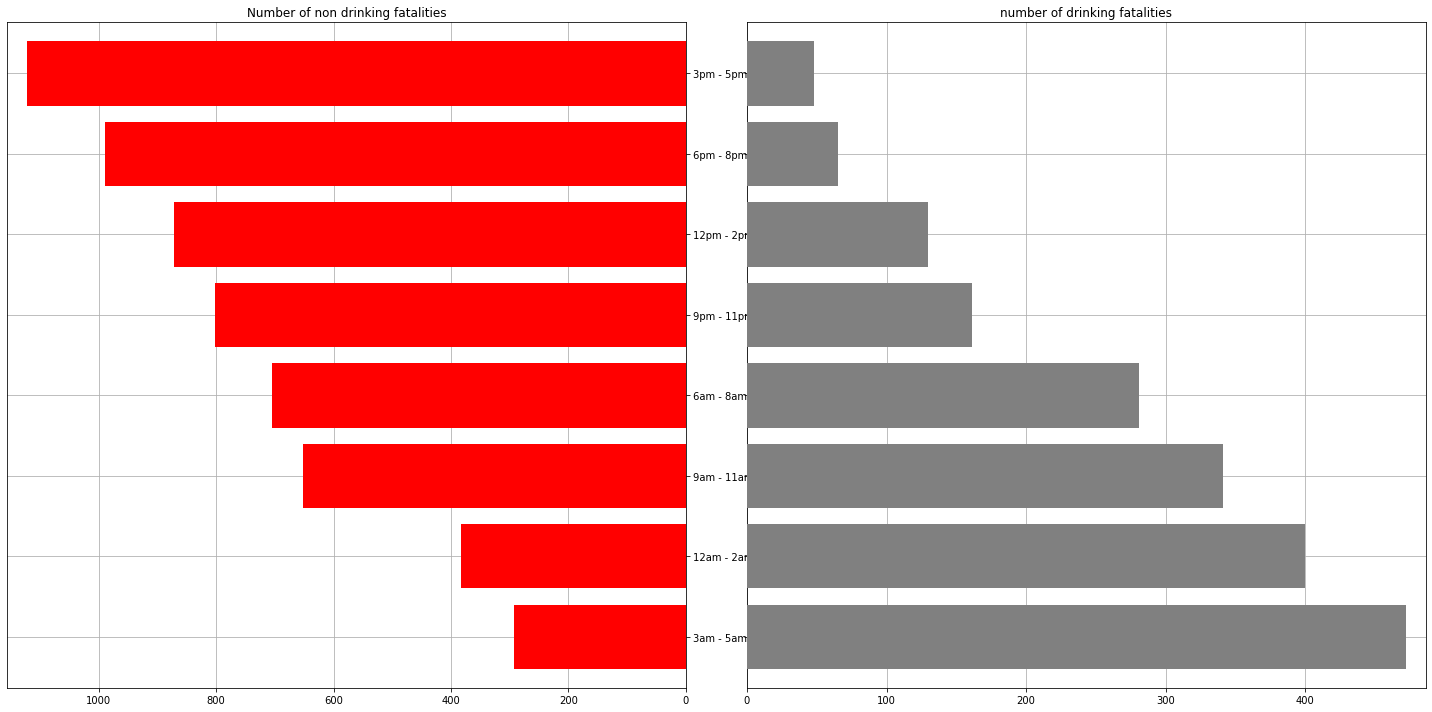

In [41]:
x = list(dict_times.values())
m = list(dict_times_drunk.values())

times = list(dict_times.keys())
values = np.array(x)
values_drunk = np.array(m)

# Sort by number of sales staff
idx = values_drunk.argsort()
times, values, values_drunk = [np.take(x, idx) for x in [times, values, values_drunk]]

y = np.arange(values.size)
z = np.arange(values_drunk.size)

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, values, align='center', color='red', zorder=10)
axes[0].set(title='Number of non drinking fatalities')
axes[1].barh(z, m, align='center', color='gray', zorder=10)
axes[1].set(title='number of drinking fatalities')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=times)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.09)
plt.show()

In [42]:
new = dataframes_dict[year]
# new = new[["ST_CASE", "DRINKING", "INJ_SEV", "HOUR", "DAY_WEEK"]]
# new.head()
new_select_values = new[new["INJ_SEV"] == 4]
new_select_values1 = new[(new["INJ_SEV"] == 4) & (new["DRINKING"] == 1)]

<Figure size 1440x1080 with 0 Axes>

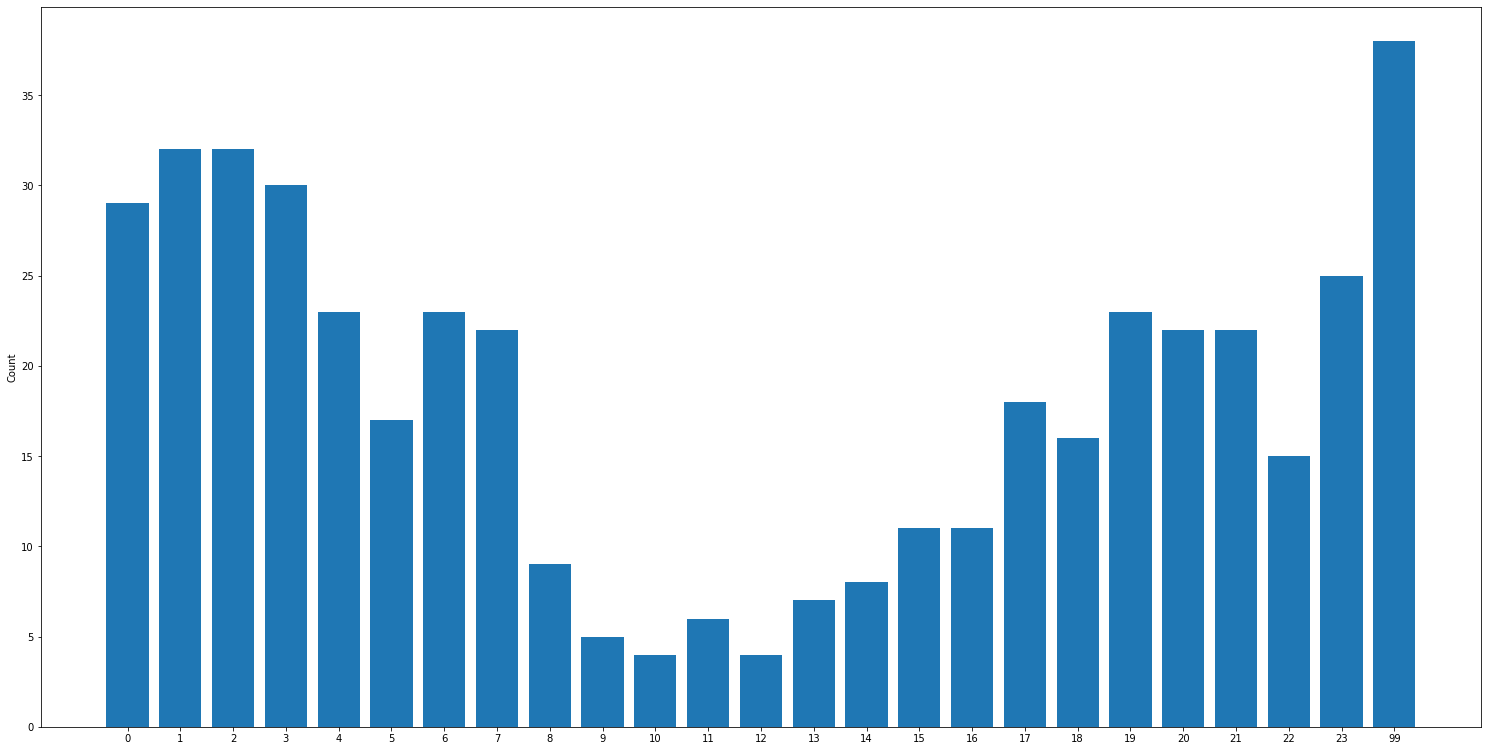

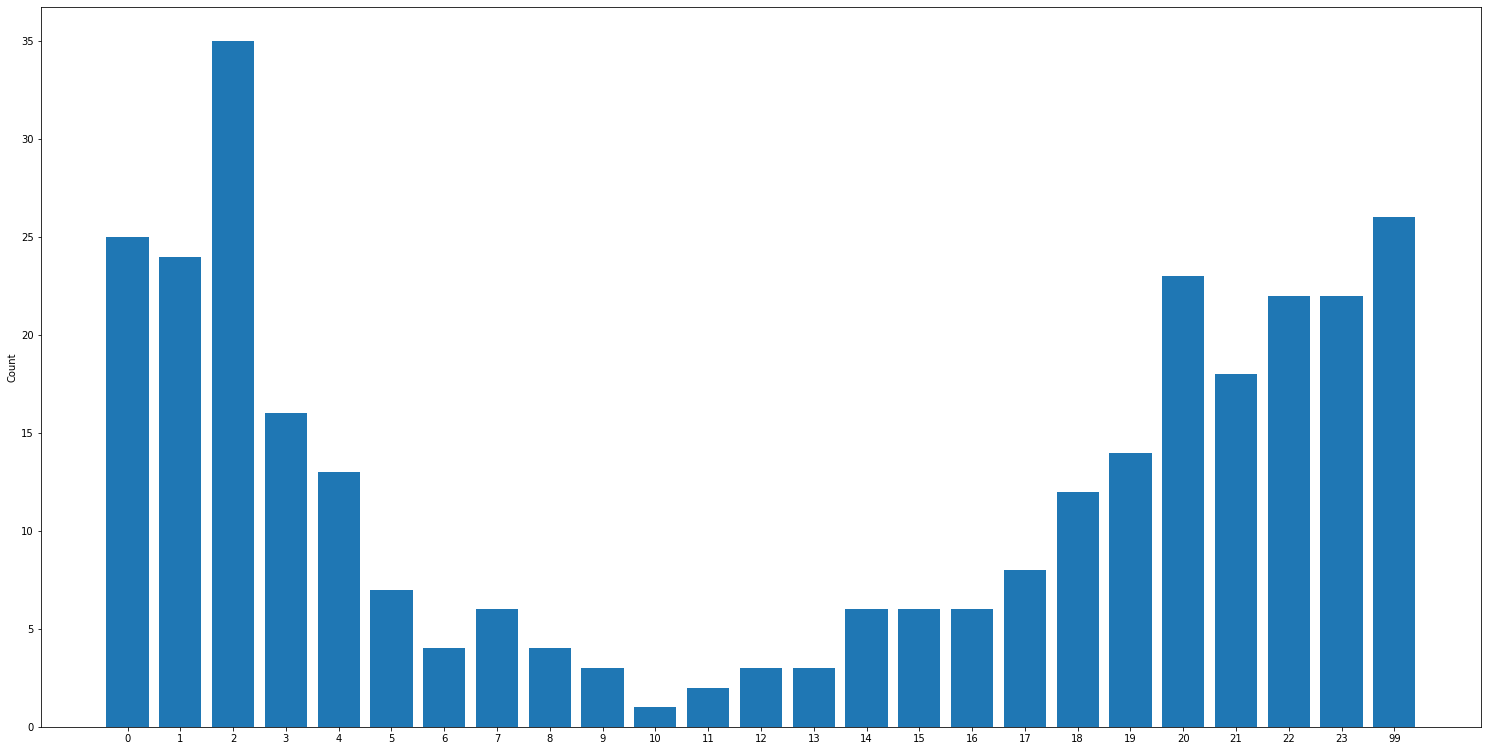

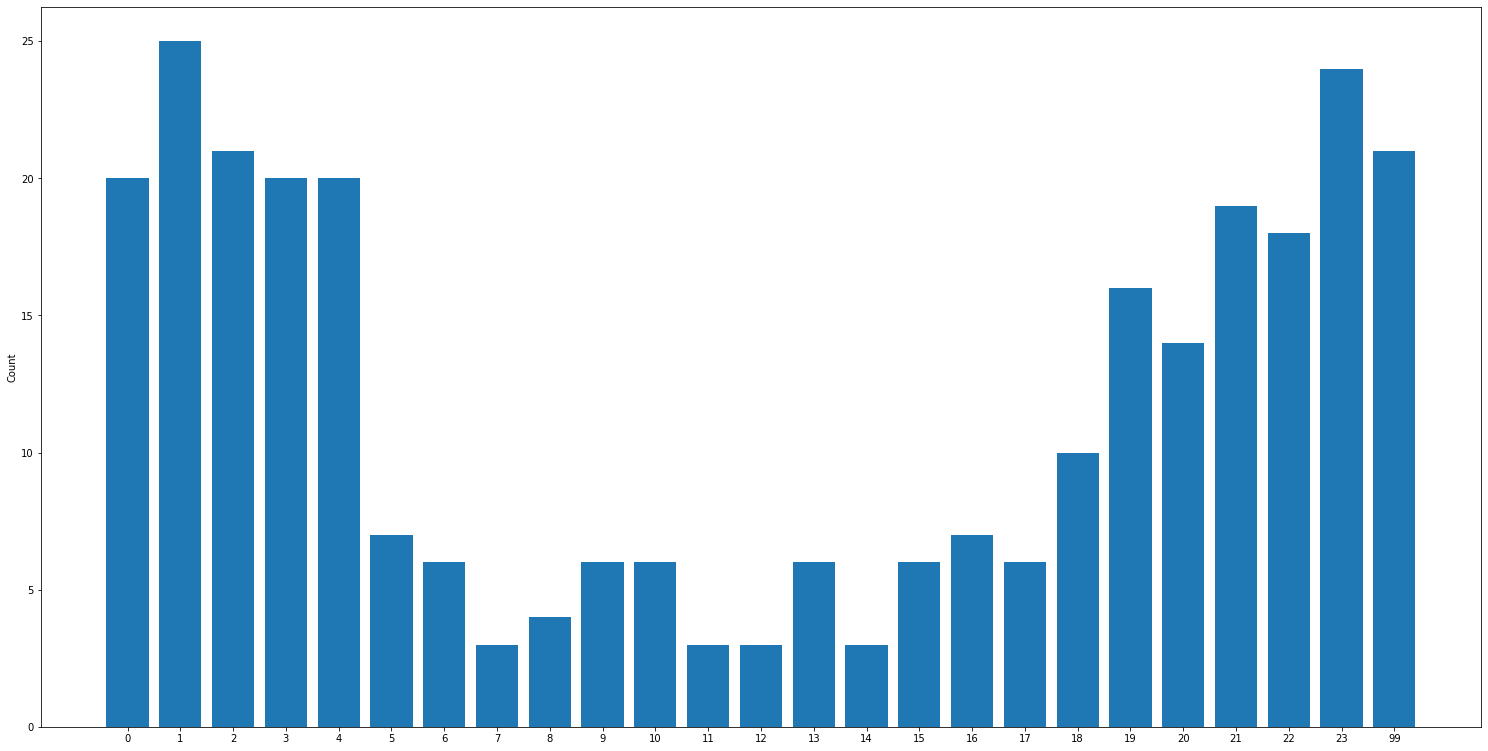

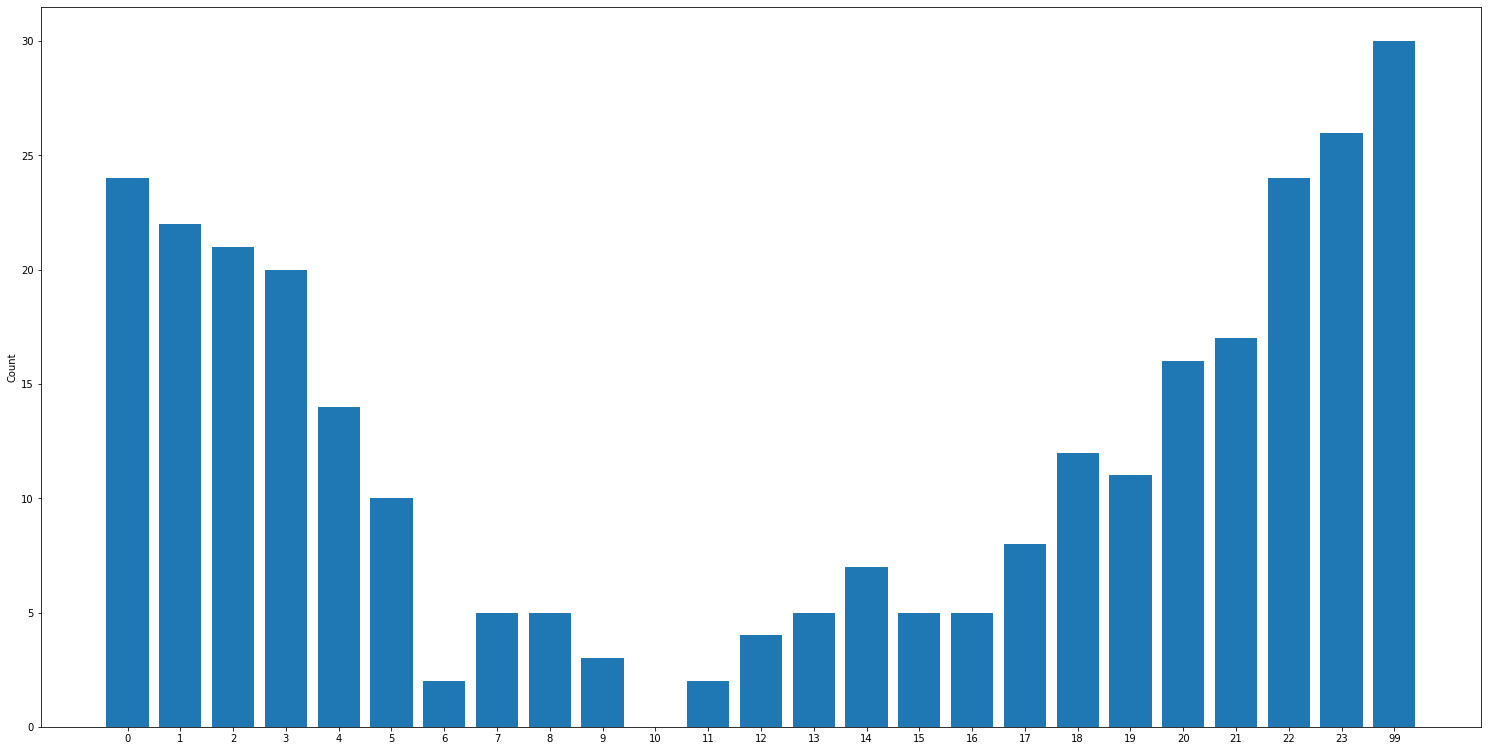

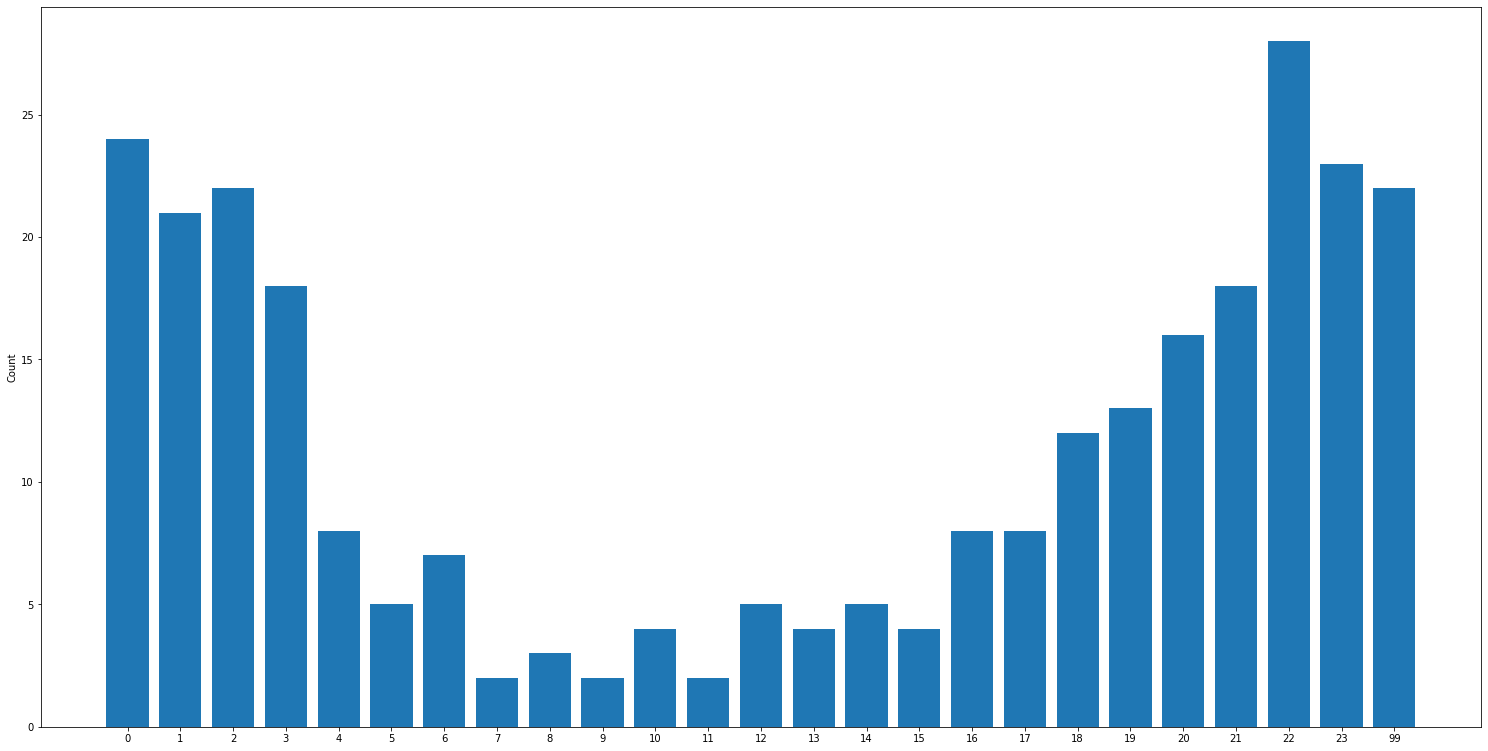

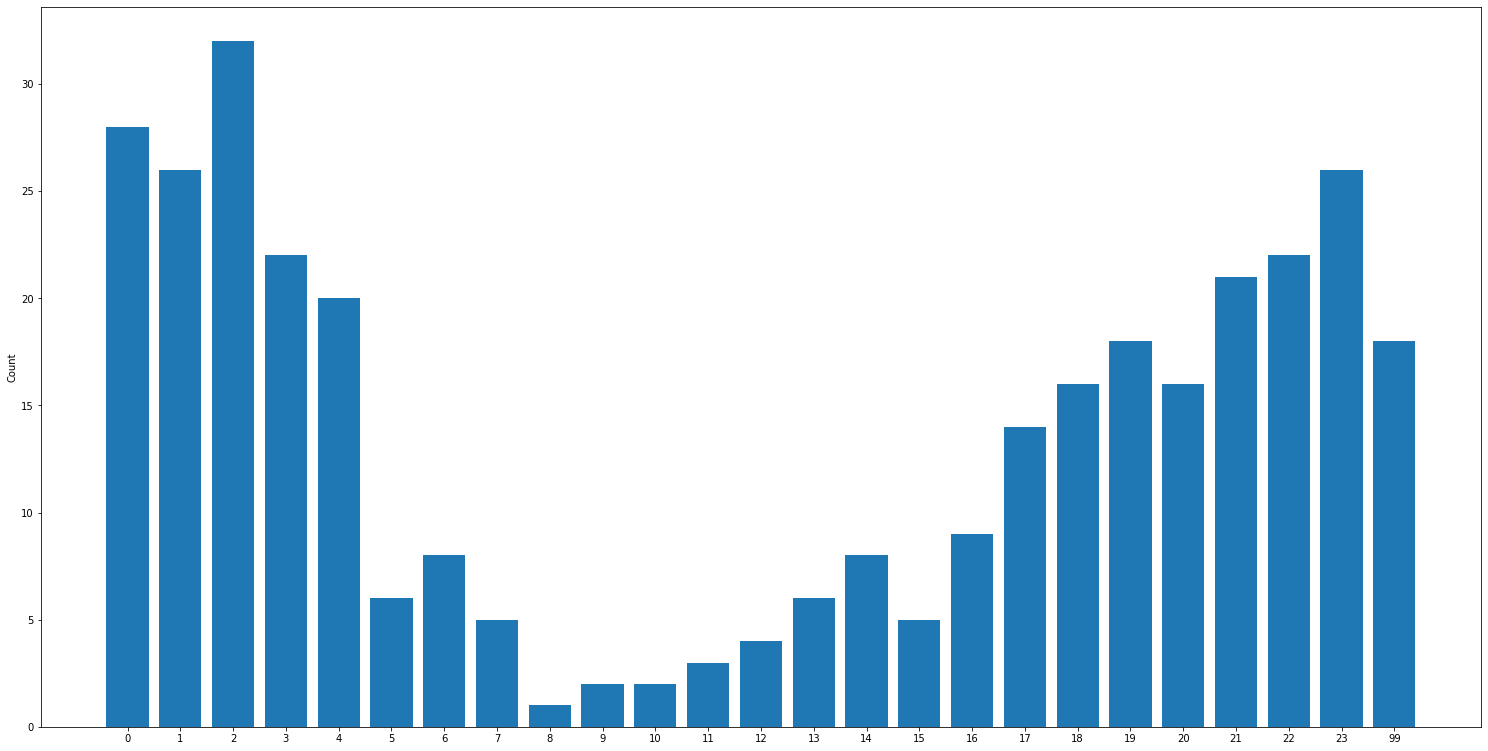

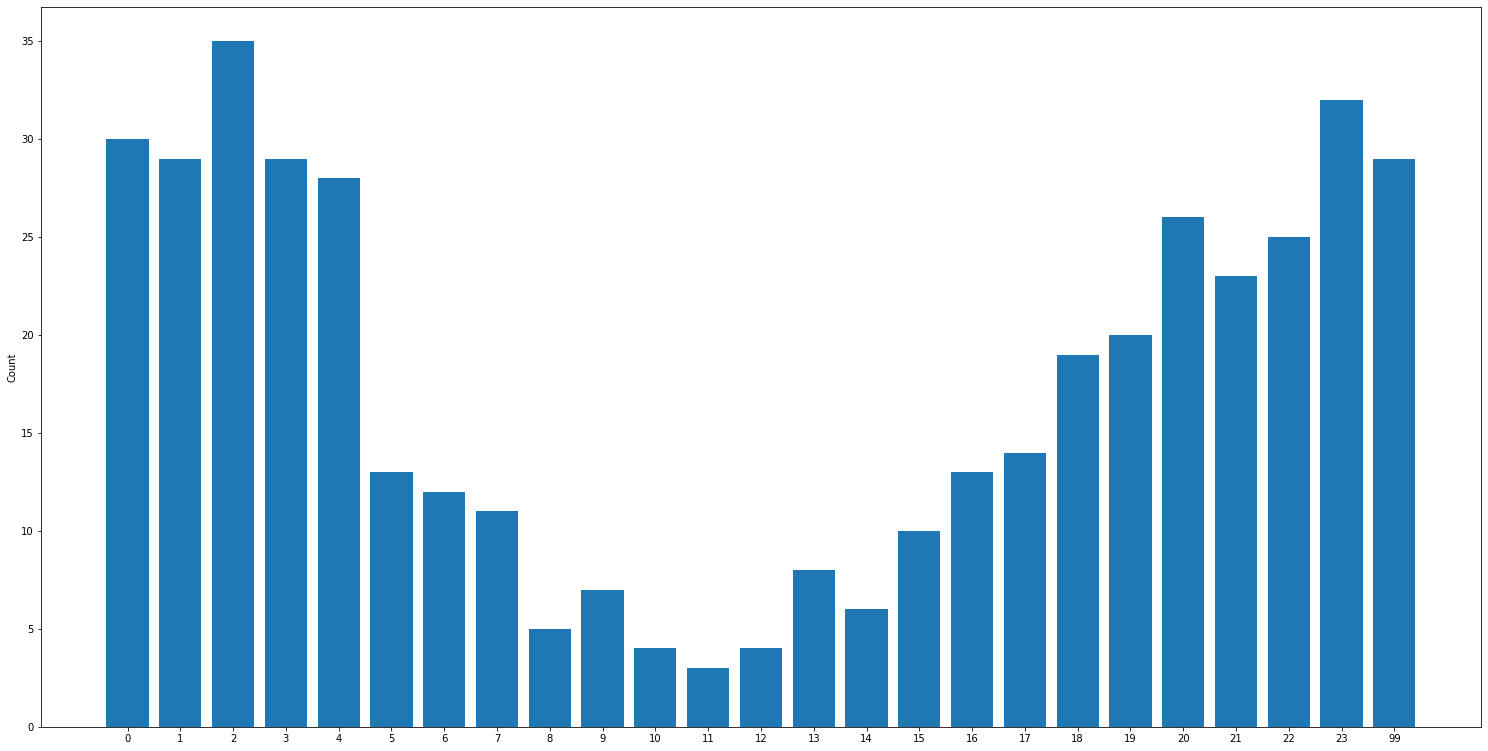

In [43]:
from operator import truediv
week_name=['SUNDAY', 'MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY']
fig = plt.figure(figsize=(20,15))
for i in range(1,8):
    l3 = []
    hours = [str(i)for i in range(0,24)]
    hours.append('99')
    x1 = new_select_values[new_select_values["DAY_WEEK"] == i]
    x2 = x1.groupby("HOUR").count()
    l1 = list(x2.DAY_WEEK)
    x3 = new_select_values1[new_select_values1["DAY_WEEK"] == i]
    x4 = x3.groupby("HOUR").count()
    l2 = list(x4.DAY_WEEK)
    for i in range(len(l1)):
        l3.append(int(l2[i]/l1[i]*100))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(hours,l3)
    plt.ylabel('Hour')
    plt.ylabel('Count')
#     plt.title(week_name[i-1])
    plt.show()

# HYPOTHESIS 2

#### As the day begins to get shorter due to daylight savings, more accidents occur between 4pm-7pm, since it gets dark earlier.

In [44]:
accident_dict = {}
for year in range(2010,2020):
    person_year = a.read_file(year, "PERSON")
    accident_dict[year] = person_year

In [45]:
year = int(input("Enter the year:\n"))

Enter the year:
2019


Text(0, 0.5, 'count')

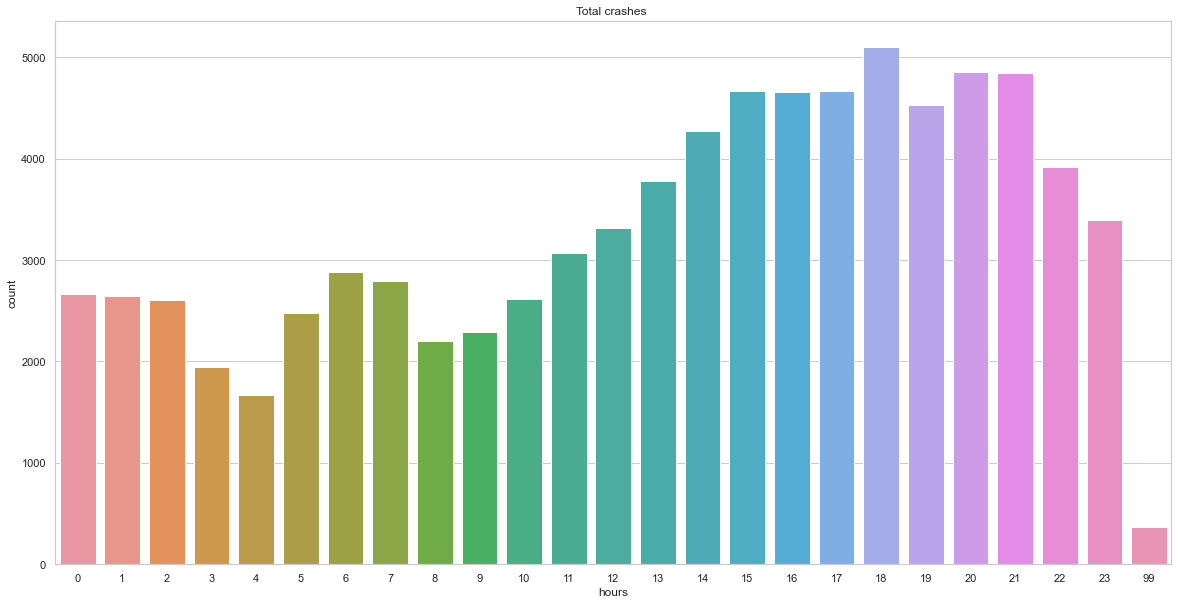

In [46]:
a = accident_dict[year].groupby(by = "HOUR").count()
a["hours"] = a.index
a1 = list(a.index)
sns.set(style="whitegrid")
ax = sns.barplot(x = "hours", y = "STATE", data=a)
plt.title('Total crashes ')
plt.ylabel('count')

##### The above graph shows that most fatalities happen during 3pm- 9pm

### COUNT OF FATALITIES BASED ON EACH MONTH BETWEEN 3PM - 9PM

Text(0.5, 0, 'Hours')

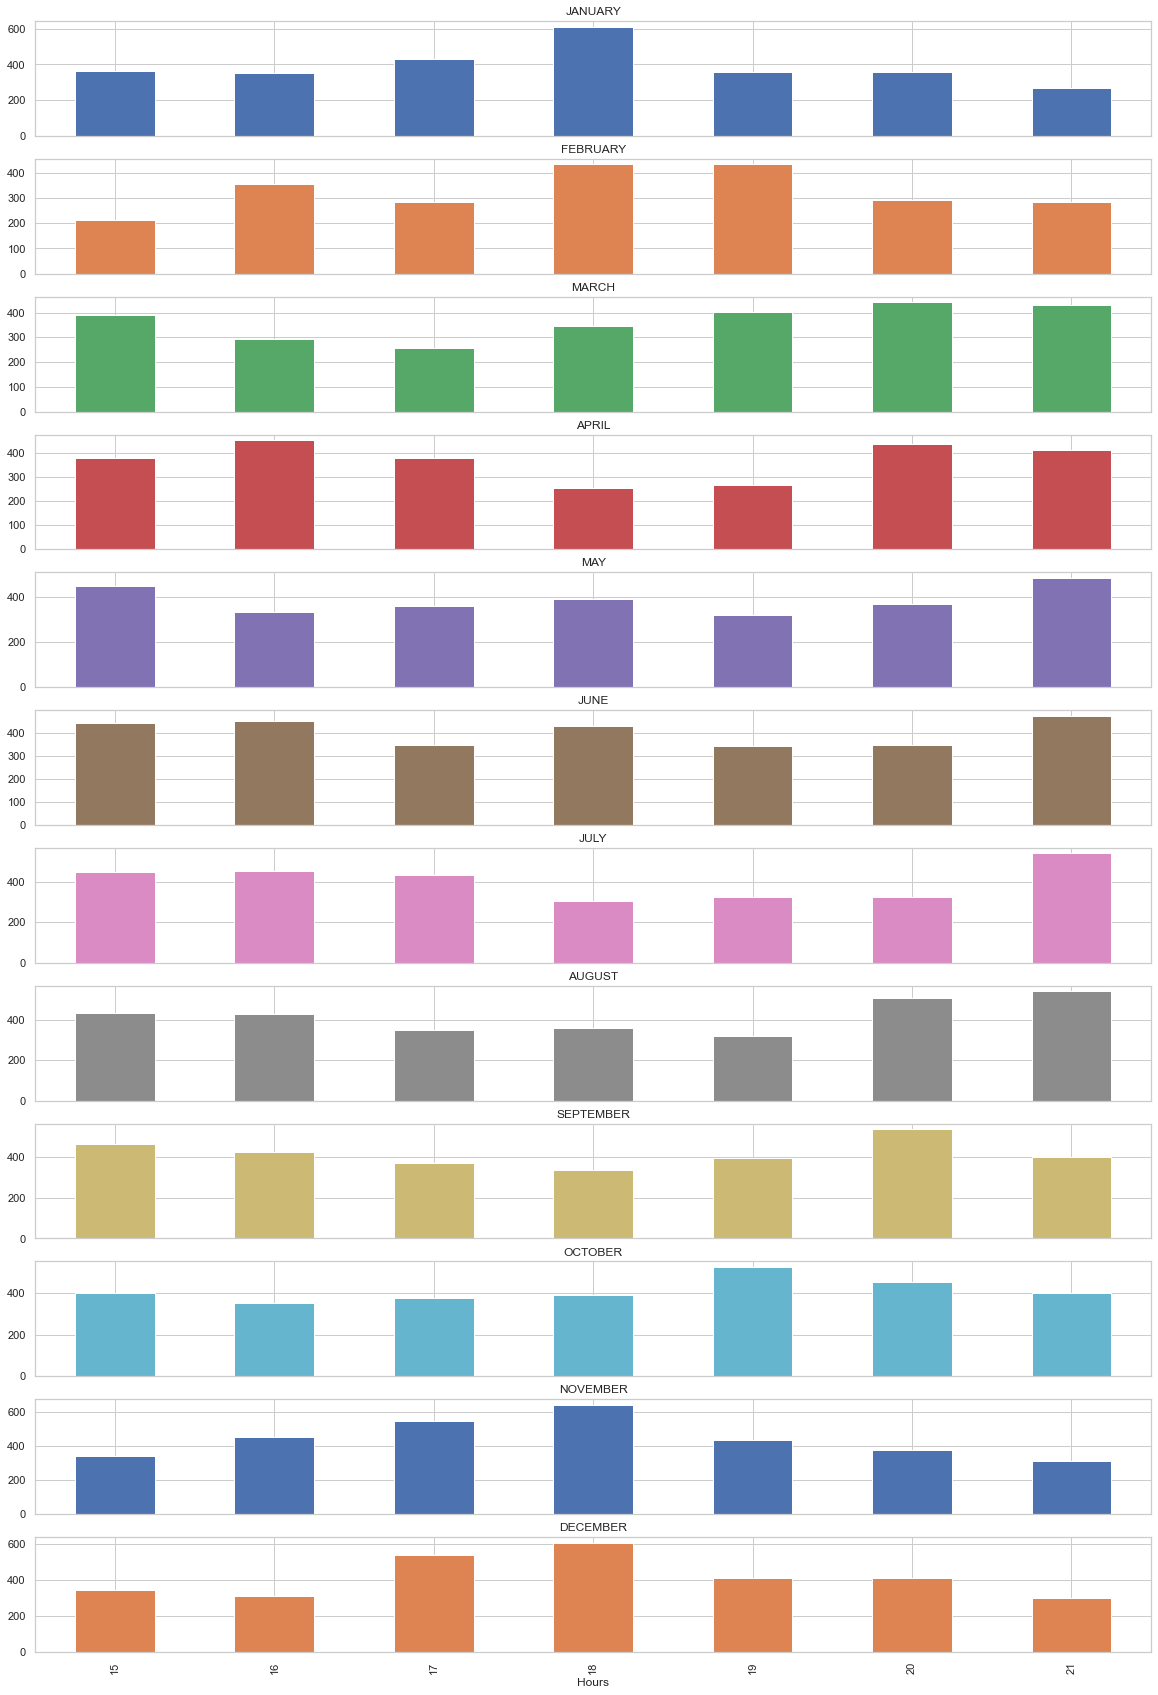

In [47]:
accident_year = accident_dict[year]
accident_year = accident_year[['HOUR', 'MONTH', 'STATE']].copy()

month_name=['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER']
fig, ax = plt.subplots(figsize=(20,30))
accident_sliced = accident_year[(accident_year['HOUR']>=15) & (accident_year['HOUR']<=21)].copy()
accident_sliced.groupby(['HOUR','MONTH']).count().unstack('MONTH').plot.bar(ax=ax, subplots=True,
                        layout=(12,1), sharey=False, sharex=True, legend = False, title=month_name)
plt.xlabel('Hours')